# import packages and/or modules

In [108]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn look
sns.set(palette = "colorblind", font_scale = 1.5)

# data

In [109]:
# group
group1 = np.repeat(["a", "b", "c", "d", "e", "f"], repeats = np.random.randint(low = 30, high = 250, size = 6))

# break into factors 1 and 2
factor1 = [{"a": "absent", "b": "absent", "c": "absent", "d": "present", "e": "present", "f": "present"}[x] for x in group1]
factor2 = [{"a": "low", "b": "moderate", "c": "high", "d": "low", "e": "moderate", "f": "high"}[x] for x in group1]

# store in data frame
df1 = pd.DataFrame({"group1": group1, "factor1": factor1, "factor2": factor2})

# see it
df1

,group1,factor1,factor2
0,a,absent,low
1,a,absent,low
2,a,absent,low
3,a,absent,low
4,a,absent,low
...,...,...,...
528,f,present,high
529,f,present,high
530,f,present,high
531,f,present,high


# plot proportions and standard errors

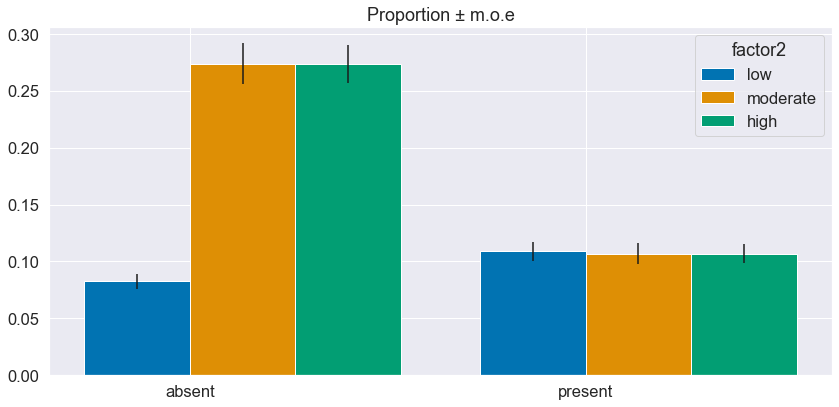

In [116]:
# data
df_plot1 = df1.groupby(["factor1", "factor2"])["factor2"].count().reset_index(name = "n").assign(phat = lambda x: x["n"] / x["n"].sum()).assign(se = lambda x: x["phat"] * (1 - x["phat"]) / np.sqrt(x["n"].sum())).assign(moe = lambda x: x["se"] * stats.norm.ppf(1 - 0.05 / 2))

# width of bars, default is 0.80, divide by 3 because each bar needs a 1/3 of space alloted by default (3 levels of factor 2)
width_bar = 0.80 / 3

# figure
plt.figure(figsize = (12, 6))

# plot
## low bars
plt.bar(x = np.arange(len(df_plot1["factor1"].unique())), height = df_plot1.loc[df_plot1["factor2"] == "low", "phat"], width = width_bar, yerr = df_plot1.loc[df_plot1["factor2"] == "low", "moe"], label = "low")

## moderate bars
plt.bar(x = np.arange(len(df_plot1["factor1"].unique())) + width_bar, height = df_plot1.loc[df_plot1["factor2"] == "high", "phat"], width = width_bar, yerr = df_plot1.loc[df_plot1["factor2"] == "moderate", "moe"], label = "moderate")

## high bars
plt.bar(x = np.arange(len(df_plot1["factor1"].unique())) + 2 * width_bar, height = df_plot1.loc[df_plot1["factor2"] == "high", "phat"], width = width_bar, yerr = df_plot1.loc[df_plot1["factor2"] == "high", "moe"], label = "high")

# x ticks and labels, divide by 2 because to levels of factor on x axis
plt.gca().set_xticks(np.arange(len(df_plot1["factor1"].unique())) + width_bar / 2)
plt.gca().set_xticklabels(df_plot1["factor1"].unique())

# title
plt.title("Proportion ± m.o.e")

# legend
plt.legend(title = "factor2", loc = "best")

# tight plot
plt.tight_layout()